## ei_runner.ipynb 
A basic script to run excitatory-inhibitory (EI) networks using the `ei_net` class imported from ei_net.py .  
By Sergio Verduzco  
December 2017

In [1]:
# importing libraries
%cd ..
from ei_net import *

/Users/sergio/projects/draculab


In [ ]:
# This is the name of the file where logging will happen
log_file = "/home/z/projects/draculab/logs/ei_net_log.txt"

In [ ]:
%%capture capt 
# logging draculab version used for this session
print('#======================================================')
print('#             | Latest git commit: |')
print('#====================================================== \n#', end=' ')
!git log -1 --oneline --color=never

In [ ]:
# Write the output of the cell above in the simulation log
with open(log_file, 'a') as f:
    f.write(capt.stdout)
    f.close()

In [9]:
# Runner configuration
ei_runner = ei_net()
#----------------------------------
ei_runner.annotate("Testing exp_dist_sig with partial connectivity.")
ei_runner.set_param('e_geom', 'rows', 15)
ei_runner.set_param('e_geom', 'columns', 14)
ei_runner.set_param('i_geom', 'rows', 10)
ei_runner.set_param('i_geom', 'columns', 10)
#ei_runner.annotate("Compensating for the reduced number of inhibitory units.")
ei_runner.set_param('ie_conn', 'weights',{'uniform' : {'low': -1., 'high' : -0.01}})
ei_runner.set_param('ii_conn', 'weights',{'uniform' : {'low': -1., 'high' : -0.01}})
#----------------------------------
#ei_runner.annotate("This is so the input at each presentation changes.")
#ei_runner.set_param('n_units', 'inp', 3) # 3 input units
#----------------------------------

ei_runner.annotate('Using exp_rate_dist ee synapses.')
ei_runner.set_param('ee_syn', 'type', synapse_types.exp_rate_dist)
ei_runner.set_param('ee_syn', 'lrate', 1.)
ei_runner.set_param('ee_syn', 'wshift', 5.)
ei_runner.set_param('ee_syn', 'c', 2.)

#----------------------------------
"""
ei_runner.annotate("Using exp_dist_sig units for the excitatory population.")
ei_runner.set_param('e_pars', 'type', unit_types.exp_dist_sig)
ei_runner.set_param('e_pars', 'tau_scale', 0.1)
ei_runner.set_param('e_pars', 'c', 3.)
ei_runner.set_param('e_pars', 'Kp', .1)

ei_runner.annotate("Using exp_dist_sig units for the inhibitory population.")
ei_runner.set_param('i_pars', 'type', unit_types.exp_dist_sig)
ei_runner.set_param('i_pars', 'tau_scale', 0.1)
ei_runner.set_param('i_pars', 'c', 3.)
ei_runner.set_param('i_pars', 'Kp', .1)
"""
#----------------------------------
ei_runner.annotate('This network has heterogeneous units.')
ne = ei_runner.e_geom['rows'] * ei_runner.e_geom['columns']
ei_runner.set_param('e_pars', 'slope', 0.5 + 3.*np.random.random(ne))
ei_runner.set_param('e_pars', 'thresh', -0.2 + 0.6*np.random.random(ne))
ei_runner.set_param('e_pars', 'tau', 0.01 + 0.04*np.random.random(ne))
ni = ei_runner.i_geom['rows'] * ei_runner.i_geom['columns']
ei_runner.set_param('i_pars', 'slope', 0.5 + 3.*np.random.random(ni))
ei_runner.set_param('i_pars', 'thresh', -0.2 + 0.6*np.random.random(ni))
ei_runner.set_param('i_pars', 'tau', 0.01 + 0.04*np.random.random(ni))
#----------------------------------
ei_runner.set_param('n', 'w_track', 16)
#----------------------------------
ei_runner.build()

In [10]:
# Simulating
n_pres = 3
inp_time = 1.
inp_amp = 0.
pres_time = 1.
ei_runner.run(n_pres, inp_time, inp_amp, pres_time, alpha=0.5)

/Users/sergio/projects/draculab/units.py:964: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-self.slope*(arg - self.thresh)))


Presentation 0 lasted 97.07920813560486 seconds.
Presentation 1 lasted 88.45390892028809 seconds.
Presentation 2 lasted 85.14369416236877 seconds.
Execution time is 270.67912435531616 seconds


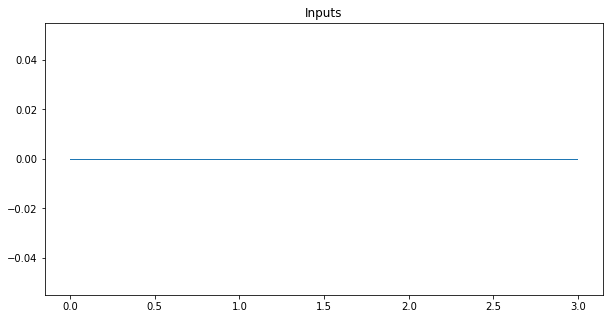

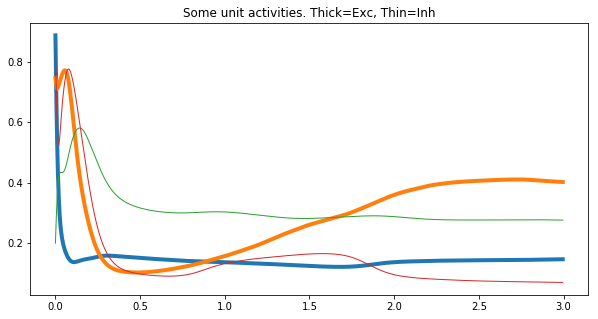

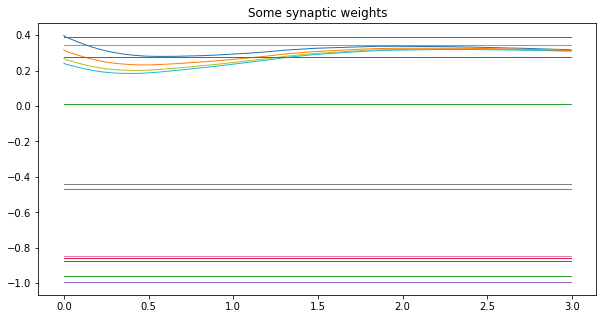

In [12]:
%matplotlib inline
ei_runner.basic_plot()

In [14]:
ei_runner.double_anim(ei_runner.e, slider=False, interv=20, nbins=20, pdf=True)

[116  80  19 123  55  72  44 136  28 103]


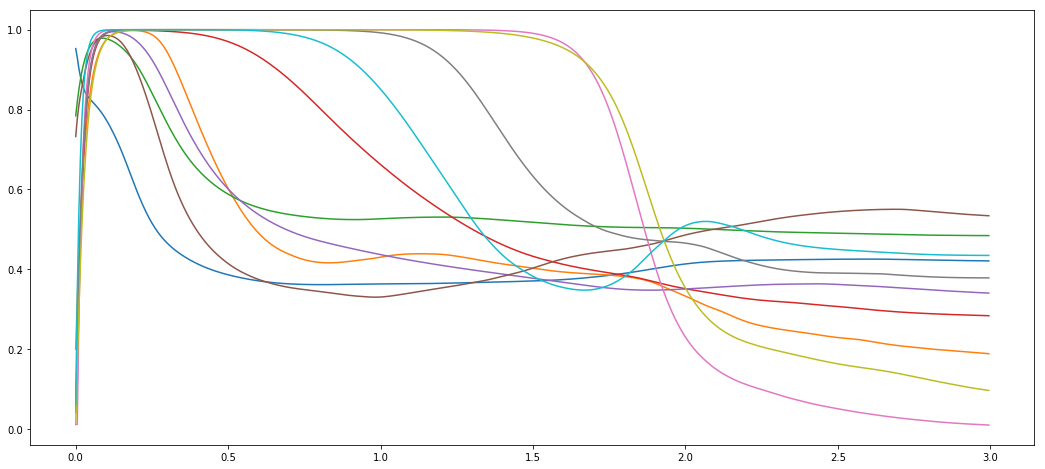

In [15]:
# Plot the highest excitatory unit activities
%matplotlib inline
n_top = 10  # how many units to plot
top_pop = ei_runner.e  # population to visualize
top_units = ei_runner.all_activs[top_pop].sum(1).argpartition(-n_top)[-n_top:]
print(top_units)
top_act_fig = plt.figure(figsize=(18,8))
top_acts = ei_runner.all_activs[top_units].transpose()
plt.plot(ei_runner.all_times, top_acts)
plt.show()

In [ ]:
# Plot the lowest excitatory unit activities
n_bottom = 30  # how many units to plot
bottom_pop = ei_runner.e  # population to visualize
bottom_units = ei_runner.all_activs[bottom_pop].sum(1).argpartition(n_bottom)[0:n_bottom]
print(bottom_units)
bottom_act_fig = plt.figure(figsize=(18,8))
bottom_acts = ei_runner.all_activs[bottom_units].transpose()
plt.plot(ei_runner.all_times, bottom_acts)
plt.show()

In [ ]:
# Annotations and log
ei_runner.annotate('This simulation shows that exp_dist_sig units can actually perform well for positive c when', make_history=False)
ei_runner.annotate('the connectivity is partial.', make_history=False)
ei_runner.log()

In [ ]:
ei_runner.history

In [ ]:
ei_runner.conn_anim(ei_runner.e, ei_runner.e, slider=True, weights=False)

In [ ]:
ei_runner.act_anim(ei_runner.e, 0.9, interv=20, slider=True)

In [ ]:
ei_runner.hist_anim(ei_runner.e, slider=True, nbins=20, pdf=True)

In [ ]:
# Some code to visualize the shape of the learning rule
f = lambda x: np.log( x/(1.-x) )
x = np.linspace(0.005, 0.99, 200)
#plt.plot(x, f(x))
y = np.linspace(0.005, 0.99, 200)
x,y = np.meshgrid(x,y)
k = np.exp(1.)/(1. - np.exp(-1))
#z = 0.1*f(x)*np.exp(y)/(y*(y-1))
z =  k * x * np.exp(y)/(144.*y*(1.-y))
%matplotlib qt5
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm, rcount=60, ccount=60, antialiased=False)
ax.set_xlabel('post rate')
ax.set_ylabel('pre rate')
ax.set_zlabel('ss weight')
plt.show()

In [ ]:
np.random.rand()